In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
resumes = pd.read_csv("AI_Resume_Screening.csv")

In [4]:
resumes.head()

Resume_ID              Name                                        Skills  \
0          1        Ashley Ali                      TensorFlow, NLP, Pytorch   
1          2      Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
2          3     Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
3          4  Elizabeth Carney                   Python, Pytorch, TensorFlow   
4          5        Julie Hill                              SQL, React, Java   

   Experience (Years) Education                Certifications  \
0                  10      B.Sc                           NaN   
1                  10       MBA                     Google ML   
2                   1       MBA  Deep Learning Specialization   
3                   7    B.Tech                 AWS Certified   
4                   4       PhD                           NaN   

                Job Role Recruiter Decision  Salary Expectation ($)  \
0          AI Researcher               Hire                  104895   
1         Data Scientist               Hire                  113002   
2  Cybersecurity Analyst               Hire                   71766   
3          AI Researcher               Hire                   46848   
4      Software Engineer               Hire                   87441   

   Projects Count  AI Score (0-100)  
0               8               100  
1               1               100  
2               7                70  
3               0                95  
4               9               100

In [5]:
resumes.tail()

Resume_ID             Name  \
995        996  Brenda Williams   
996        997    Colleen Hicks   
997        998  Michelle Molina   
998        999    Danielle Horn   
999       1000     Chad Collins   

                                                Skills  Experience (Years)  \
995              Cybersecurity, Linux, Ethical Hacking                   0   
996                    Deep Learning, Machine Learning                   0   
997                                    TensorFlow, NLP                   0   
998  Linux, Networking, Cybersecurity, Ethical Hacking                   8   
999       SQL, Machine Learning, Python, Deep Learning                   7   

    Education                Certifications               Job Role  \
995      B.Sc                           NaN  Cybersecurity Analyst   
996       MBA  Deep Learning Specialization         Data Scientist   
997    B.Tech                     Google ML          AI Researcher   
998       PhD                 AWS Certified  Cybersecurity Analyst   
999    M.Tech  Deep Learning Specialization         Data Scientist   

    Recruiter Decision  Salary Expectation ($)  Projects Count  \
995             Reject                  114364               9   
996             Reject                  103294               5   
997               Hire                  113855               9   
998               Hire                   83146              10   
999               Hire                  119474               3   

     AI Score (0-100)  
995                60  
996                45  
997                65  
998               100  
999               100

In [269]:
resumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [270]:
resumes.shape

(1000, 11)

In [271]:
resumes.apply(lambda x: sum(x.isnull()), axis=0)

Resume_ID                   0
Name                        0
Skills                      0
Experience (Years)          0
Education                   0
Certifications            274
Job Role                    0
Recruiter Decision          0
Salary Expectation ($)      0
Projects Count              0
AI Score (0-100)            0
dtype: int64

In [272]:
numOfDuplicates = resumes.duplicated().sum()

In [273]:
numOfDuplicates

0

In [11]:
resumes['Experience (Years)'].mean()

4.896

In [12]:
resumes['Salary Expectation ($)'].mean()

79994.486

In [13]:
resumes['Projects Count'].mean()

5.133

In [14]:
resumes['AI Score (0-100)'].mean()

83.95

In [15]:
len(resumes[resumes['Recruiter Decision']=='Hire'])

812

In [17]:
len(resumes[resumes['Recruiter Decision']=='Reject'])

188

In [6]:
resumes = resumes.set_index('Resume_ID')

In [7]:
resumes.head()

Name                                        Skills  \
Resume_ID                                                                   
1                Ashley Ali                      TensorFlow, NLP, Pytorch   
2              Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
3             Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
4          Elizabeth Carney                   Python, Pytorch, TensorFlow   
5                Julie Hill                              SQL, React, Java   

           Experience (Years) Education                Certifications  \
Resume_ID                                                               
1                          10      B.Sc                           NaN   
2                          10       MBA                     Google ML   
3                           1       MBA  Deep Learning Specialization   
4                           7    B.Tech                 AWS Certified   
5                           4       PhD                           NaN   

                        Job Role Recruiter Decision  Salary Expectation ($)  \
Resume_ID                                                                     
1                  AI Researcher               Hire                  104895   
2                 Data Scientist               Hire                  113002   
3          Cybersecurity Analyst               Hire                   71766   
4                  AI Researcher               Hire                   46848   
5              Software Engineer               Hire                   87441   

           Projects Count  AI Score (0-100)  
Resume_ID                                    
1                       8               100  
2                       1               100  
3                       7                70  
4                       0                95  
5                       9               100

In [160]:
resumes['Job Role'].unique()

array(['AI Researcher', 'Data Scientist', 'Cybersecurity Analyst',
       'Software Engineer'], dtype=object)

In [25]:
resumes['Education'].unique()

array(['B.Sc', 'MBA', 'B.Tech', 'PhD', 'M.Tech'], dtype=object)

In [26]:
resumes['Certifications'].unique()

array([nan, 'Google ML', 'Deep Learning Specialization', 'AWS Certified'],
      dtype=object)

In [276]:
resumes.apply(lambda x: sum(x.isna()), axis=0)

Name                        0
Skills                      0
Experience (Years)          0
Education                   0
Certifications            274
Job Role                    0
Recruiter Decision          0
Salary Expectation ($)      0
Projects Count              0
AI Score (0-100)            0
dtype: int64

In [8]:
resumes['Certifications'] = resumes['Certifications'].fillna('No Certification')

In [9]:
resumes.apply(lambda x: sum(x.isna()), axis=0)

Name                      0
Skills                    0
Experience (Years)        0
Education                 0
Certifications            0
Job Role                  0
Recruiter Decision        0
Salary Expectation ($)    0
Projects Count            0
AI Score (0-100)          0
dtype: int64

In [225]:
resumes.head()

Name                                        Skills  \
Resume_ID                                                                   
1                Ashley Ali                      TensorFlow, NLP, Pytorch   
2              Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
3             Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
4          Elizabeth Carney                   Python, Pytorch, TensorFlow   
5                Julie Hill                              SQL, React, Java   

           Experience (Years) Education                Certifications  \
Resume_ID                                                               
1                          10      B.Sc              No Certification   
2                          10       MBA                     Google ML   
3                           1       MBA  Deep Learning Specialization   
4                           7    B.Tech                 AWS Certified   
5                           4       PhD              No Certification   

                        Job Role Recruiter Decision  Salary Expectation ($)  \
Resume_ID                                                                     
1                  AI Researcher               Hire                  104895   
2                 Data Scientist               Hire                  113002   
3          Cybersecurity Analyst               Hire                   71766   
4                  AI Researcher               Hire                   46848   
5              Software Engineer               Hire                   87441   

           Projects Count  AI Score (0-100)  
Resume_ID                                    
1                       8               100  
2                       1               100  
3                       7                70  
4                       0                95  
5                       9               100

In [226]:
resumes.tail()

Name                                             Skills  \
Resume_ID                                                                       
996        Brenda Williams              Cybersecurity, Linux, Ethical Hacking   
997          Colleen Hicks                    Deep Learning, Machine Learning   
998        Michelle Molina                                    TensorFlow, NLP   
999          Danielle Horn  Linux, Networking, Cybersecurity, Ethical Hacking   
1000          Chad Collins       SQL, Machine Learning, Python, Deep Learning   

           Experience (Years) Education                Certifications  \
Resume_ID                                                               
996                         0      B.Sc              No Certification   
997                         0       MBA  Deep Learning Specialization   
998                         0    B.Tech                     Google ML   
999                         8       PhD                 AWS Certified   
1000                        7    M.Tech  Deep Learning Specialization   

                        Job Role Recruiter Decision  Salary Expectation ($)  \
Resume_ID                                                                     
996        Cybersecurity Analyst             Reject                  114364   
997               Data Scientist             Reject                  103294   
998                AI Researcher               Hire                  113855   
999        Cybersecurity Analyst               Hire                   83146   
1000              Data Scientist               Hire                  119474   

           Projects Count  AI Score (0-100)  
Resume_ID                                    
996                     9                60  
997                     5                45  
998                     9                65  
999                    10               100  
1000                    3               100

In [227]:
resumes['Certifications'].value_counts()

Certifications
No Certification                274
Deep Learning Specialization    255
AWS Certified                   249
Google ML                       222
Name: count, dtype: int64

In [228]:
resumes['Education'].value_counts()

Education
B.Sc      205
MBA       202
B.Tech    200
M.Tech    198
PhD       195
Name: count, dtype: int64

In [229]:
resumes['Job Role'].value_counts()

Job Role
AI Researcher            257
Data Scientist           255
Cybersecurity Analyst    255
Software Engineer        233
Name: count, dtype: int64

In [10]:
resumes.rename(columns={"Recruiter Decision": "Hired"}, inplace=True)

In [11]:
resumes.head()

Name                                        Skills  \
Resume_ID                                                                   
1                Ashley Ali                      TensorFlow, NLP, Pytorch   
2              Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
3             Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
4          Elizabeth Carney                   Python, Pytorch, TensorFlow   
5                Julie Hill                              SQL, React, Java   

           Experience (Years) Education                Certifications  \
Resume_ID                                                               
1                          10      B.Sc              No Certification   
2                          10       MBA                     Google ML   
3                           1       MBA  Deep Learning Specialization   
4                           7    B.Tech                 AWS Certified   
5                           4       PhD              No Certification   

                        Job Role Hired  Salary Expectation ($)  \
Resume_ID                                                        
1                  AI Researcher  Hire                  104895   
2                 Data Scientist  Hire                  113002   
3          Cybersecurity Analyst  Hire                   71766   
4                  AI Researcher  Hire                   46848   
5              Software Engineer  Hire                   87441   

           Projects Count  AI Score (0-100)  
Resume_ID                                    
1                       8               100  
2                       1               100  
3                       7                70  
4                       0                95  
5                       9               100

In [12]:
resumes['Hired'] = resumes['Hired'].map(
    {'Hire': 1, 'Reject': 0}
)

In [13]:
resumes.head()

Name                                        Skills  \
Resume_ID                                                                   
1                Ashley Ali                      TensorFlow, NLP, Pytorch   
2              Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
3             Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
4          Elizabeth Carney                   Python, Pytorch, TensorFlow   
5                Julie Hill                              SQL, React, Java   

           Experience (Years) Education                Certifications  \
Resume_ID                                                               
1                          10      B.Sc              No Certification   
2                          10       MBA                     Google ML   
3                           1       MBA  Deep Learning Specialization   
4                           7    B.Tech                 AWS Certified   
5                           4       PhD              No Certification   

                        Job Role  Hired  Salary Expectation ($)  \
Resume_ID                                                         
1                  AI Researcher      1                  104895   
2                 Data Scientist      1                  113002   
3          Cybersecurity Analyst      1                   71766   
4                  AI Researcher      1                   46848   
5              Software Engineer      1                   87441   

           Projects Count  AI Score (0-100)  
Resume_ID                                    
1                       8               100  
2                       1               100  
3                       7                70  
4                       0                95  
5                       9               100

In [234]:
resumes.tail()

Name                                             Skills  \
Resume_ID                                                                       
996        Brenda Williams              Cybersecurity, Linux, Ethical Hacking   
997          Colleen Hicks                    Deep Learning, Machine Learning   
998        Michelle Molina                                    TensorFlow, NLP   
999          Danielle Horn  Linux, Networking, Cybersecurity, Ethical Hacking   
1000          Chad Collins       SQL, Machine Learning, Python, Deep Learning   

           Experience (Years) Education                Certifications  \
Resume_ID                                                               
996                         0      B.Sc              No Certification   
997                         0       MBA  Deep Learning Specialization   
998                         0    B.Tech                     Google ML   
999                         8       PhD                 AWS Certified   
1000                        7    M.Tech  Deep Learning Specialization   

                        Job Role  Hired  Salary Expectation ($)  \
Resume_ID                                                         
996        Cybersecurity Analyst      0                  114364   
997               Data Scientist      0                  103294   
998                AI Researcher      1                  113855   
999        Cybersecurity Analyst      1                   83146   
1000              Data Scientist      1                  119474   

           Projects Count  AI Score (0-100)  
Resume_ID                                    
996                     9                60  
997                     5                45  
998                     9                65  
999                    10               100  
1000                    3               100

In [235]:
resumes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    1000 non-null   object
 1   Skills                  1000 non-null   object
 2   Experience (Years)      1000 non-null   int64 
 3   Education               1000 non-null   object
 4   Certifications          1000 non-null   object
 5   Job Role                1000 non-null   object
 6   Hired                   1000 non-null   int64 
 7   Salary Expectation ($)  1000 non-null   int64 
 8   Projects Count          1000 non-null   int64 
 9   AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 85.9+ KB


In [14]:
resumes['Skill Count'] = resumes['Skills'].str.split(',').apply(len)    

In [283]:
resumes.head(10)

Name  \
Resume_ID                     
1                Ashley Ali   
2              Wesley Roman   
3             Corey Sanchez   
4          Elizabeth Carney   
5                Julie Hill   
6           Samantha Santos   
7                Tony Smith   
8          Anthony Harrison   
9             Nancy Jenkins   
10          Courtney Gibson   

                                                      Skills  \
Resume_ID                                                      
1                                   TensorFlow, NLP, Pytorch   
2               Deep Learning, Machine Learning, Python, SQL   
3                      Ethical Hacking, Cybersecurity, Linux   
4                                Python, Pytorch, TensorFlow   
5                                           SQL, React, Java   
6          Cybersecurity, Networking, Linux, Ethical Hacking   
7                 Networking, Cybersecurity, Ethical Hacking   
8                                   TensorFlow, Pytorch, NLP   
9                                Networking, Ethical Hacking   
10                          Python, TensorFlow, Pytorch, NLP   

           Experience (Years) Education                Certifications  \
Resume_ID                                                               
1                          10      B.Sc              No Certification   
2                          10       MBA                     Google ML   
3                           1       MBA  Deep Learning Specialization   
4                           7    B.Tech                 AWS Certified   
5                           4       PhD              No Certification   
6                          10    B.Tech                     Google ML   
7                           4    M.Tech                 AWS Certified   
8                           3    M.Tech                 AWS Certified   
9                           7       MBA  Deep Learning Specialization   
10                          0    M.Tech                 AWS Certified   

                        Job Role  Hired  Salary Expectation ($)  \
Resume_ID                                                         
1                  AI Researcher      1                  104895   
2                 Data Scientist      1                  113002   
3          Cybersecurity Analyst      1                   71766   
4                  AI Researcher      1                   46848   
5              Software Engineer      1                   87441   
6          Cybersecurity Analyst      1                   47957   
7          Cybersecurity Analyst      1                   66208   
8                  AI Researcher      1                  103006   
9          Cybersecurity Analyst      1                   92270   
10                 AI Researcher      0                   60579   

           Projects Count  AI Score (0-100)  Skill Count  
Resume_ID                                                 
1                       8               100            3  
2                       1               100            4  
3                       7                70            3  
4                       0                95            3  
5                       9               100            3  
6                       5               100            4  
7                       9               100            3  
8                       7                90            3  
9                       3               100            2  
10                      1                35            4

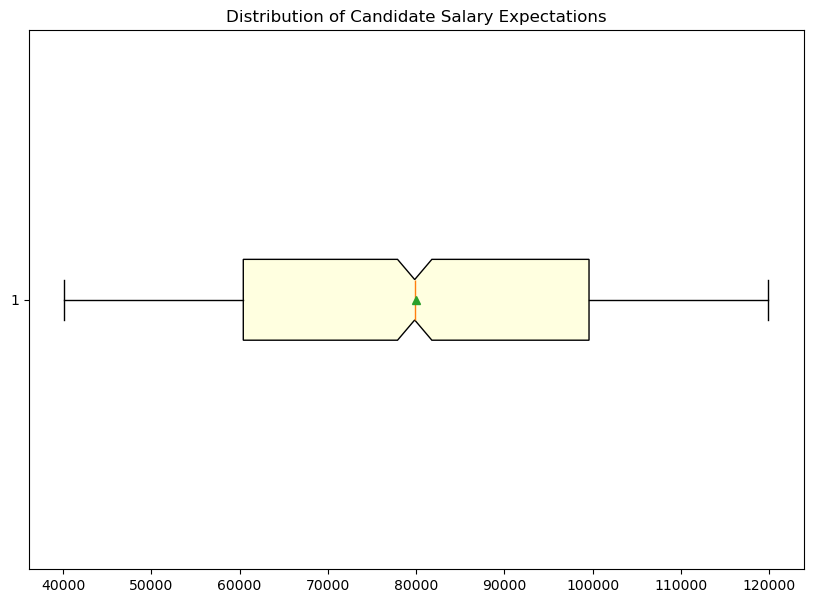

In [15]:
fig = plt.figure(figsize =(10, 7))
salary_dist = plt.boxplot(resumes['Salary Expectation ($)'], vert=False, notch=True, patch_artist=True, showmeans=True, meanline=False, boxprops=dict(facecolor="lightyellow"))
plt.title("Distribution of Candidate Salary Expectations")
plt.show()

<Axes: xlabel='Job Role', ylabel='Count'>

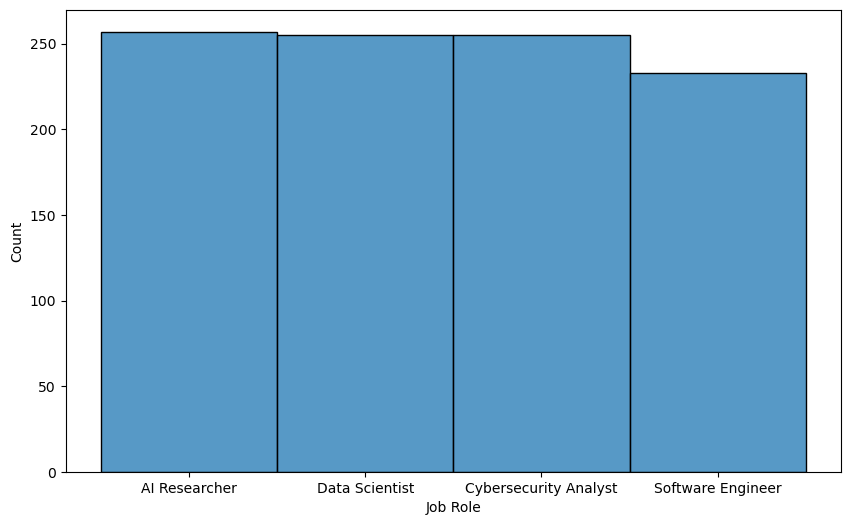

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=resumes, x="Job Role", stat='count', binwidth=5)

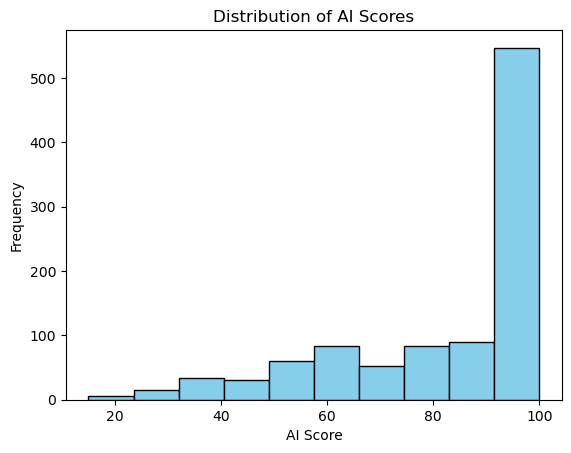

In [18]:
resumes['AI Score (0-100)'].hist(bins=10, color='skyblue', edgecolor='black', grid=False, cumulative=False)
plt.xlabel("AI Score")
plt.ylabel("Frequency")
plt.title("Distribution of AI Scores")
plt.show()

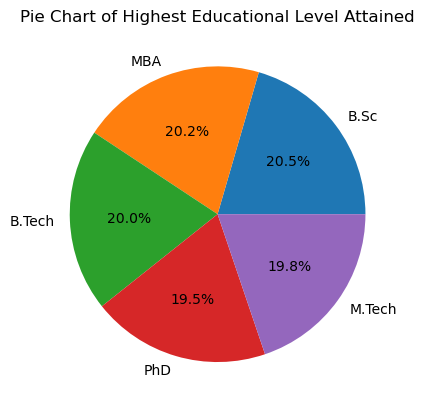

In [19]:
educationCounts = {}
for row in resumes['Education']:
    if row not in educationCounts:
        educationCounts[row] = 1
    else:
        educationCounts[row] += 1
labels = list(educationCounts.keys())
sizes = list(educationCounts.values())

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Pie Chart of Highest Educational Level Attained")
plt.show()

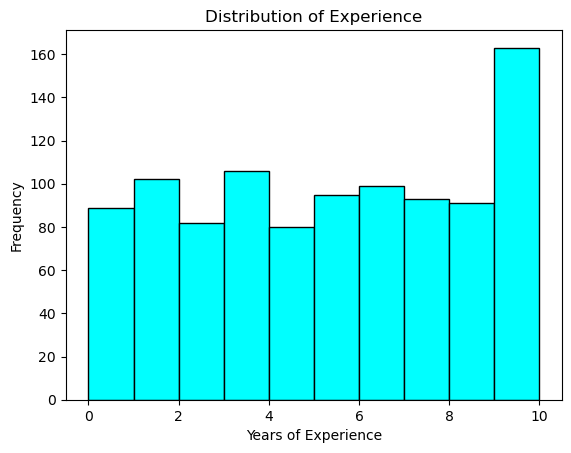

In [20]:
resumes['Experience (Years)'].hist(bins=10, color='cyan', edgecolor='black', grid=False, cumulative=False)
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")
plt.title("Distribution of Experience")
plt.show()

<Axes: xlabel='Certifications', ylabel='Count'>

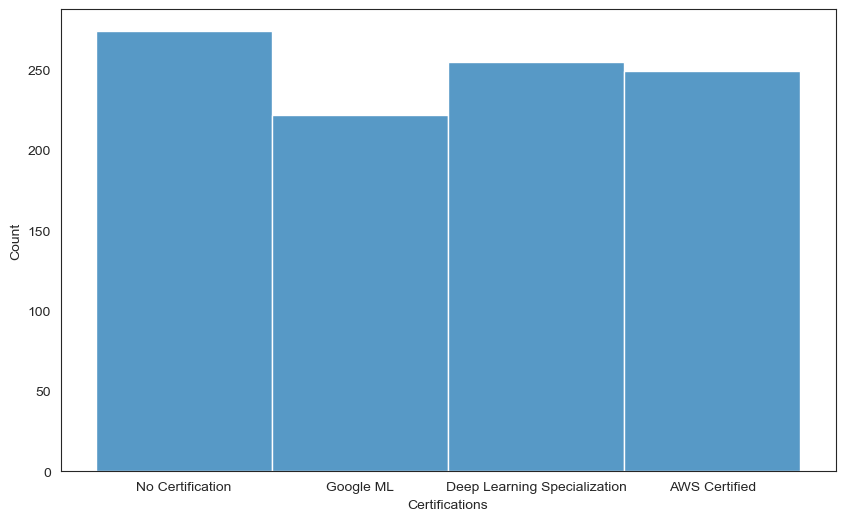

In [21]:
plt.figure(figsize=(10, 6))
sns.set_style("white")
sns.histplot(data=resumes, x="Certifications", stat='count', binwidth=5)

In [22]:
resumes['Skill Count'] = resumes['Skills'].apply(lambda x: len([skill.strip() for skill in x.split(',')]))

In [245]:
resumes.head()

Name                                        Skills  \
Resume_ID                                                                   
1                Ashley Ali                      TensorFlow, NLP, Pytorch   
2              Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
3             Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
4          Elizabeth Carney                   Python, Pytorch, TensorFlow   
5                Julie Hill                              SQL, React, Java   

           Experience (Years) Education                Certifications  \
Resume_ID                                                               
1                          10      B.Sc              No Certification   
2                          10       MBA                     Google ML   
3                           1       MBA  Deep Learning Specialization   
4                           7    B.Tech                 AWS Certified   
5                           4       PhD              No Certification   

                        Job Role  Hired  Salary Expectation ($)  \
Resume_ID                                                         
1                  AI Researcher      1                  104895   
2                 Data Scientist      1                  113002   
3          Cybersecurity Analyst      1                   71766   
4                  AI Researcher      1                   46848   
5              Software Engineer      1                   87441   

           Projects Count  AI Score (0-100)  Skill Count  
Resume_ID                                                 
1                       8               100            3  
2                       1               100            4  
3                       7                70            3  
4                       0                95            3  
5                       9               100            3

In [23]:
resumes['Certifications'].unique()

array(['No Certification', 'Google ML', 'Deep Learning Specialization',
       'AWS Certified'], dtype=object)

In [24]:
resumes['Certifications'] = resumes['Certifications'].map(
    {'No Certification': 0, 'Google ML': 1, 'Deep Learning Specialization': 1, 'AWS Certified': 1}
)

In [25]:
resumes.rename(columns={"Certifications": "Has Certification"}, inplace=True)

In [26]:
resumes.head()

Name                                        Skills  \
Resume_ID                                                                   
1                Ashley Ali                      TensorFlow, NLP, Pytorch   
2              Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
3             Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
4          Elizabeth Carney                   Python, Pytorch, TensorFlow   
5                Julie Hill                              SQL, React, Java   

           Experience (Years) Education  Has Certification  \
Resume_ID                                                    
1                          10      B.Sc                  0   
2                          10       MBA                  1   
3                           1       MBA                  1   
4                           7    B.Tech                  1   
5                           4       PhD                  0   

                        Job Role  Hired  Salary Expectation ($)  \
Resume_ID                                                         
1                  AI Researcher      1                  104895   
2                 Data Scientist      1                  113002   
3          Cybersecurity Analyst      1                   71766   
4                  AI Researcher      1                   46848   
5              Software Engineer      1                   87441   

           Projects Count  AI Score (0-100)  Skill Count  
Resume_ID                                                 
1                       8               100            3  
2                       1               100            4  
3                       7                70            3  
4                       0                95            3  
5                       9               100            3

In [27]:
resumes['Education'].unique()

array(['B.Sc', 'MBA', 'B.Tech', 'PhD', 'M.Tech'], dtype=object)

In [251]:
resumes.head()

Name                                        Skills  \
Resume_ID                                                                   
1                Ashley Ali                      TensorFlow, NLP, Pytorch   
2              Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
3             Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
4          Elizabeth Carney                   Python, Pytorch, TensorFlow   
5                Julie Hill                              SQL, React, Java   

           Experience (Years) Education  Has Certification  \
Resume_ID                                                    
1                          10      B.Sc                  0   
2                          10       MBA                  1   
3                           1       MBA                  1   
4                           7    B.Tech                  1   
5                           4       PhD                  0   

                        Job Role  Hired  Salary Expectation ($)  \
Resume_ID                                                         
1                  AI Researcher      1                  104895   
2                 Data Scientist      1                  113002   
3          Cybersecurity Analyst      1                   71766   
4                  AI Researcher      1                   46848   
5              Software Engineer      1                   87441   

           Projects Count  AI Score (0-100)  Skill Count  
Resume_ID                                                 
1                       8               100            3  
2                       1               100            4  
3                       7                70            3  
4                       0                95            3  
5                       9               100            3

In [252]:
resumes.tail()

Name                                             Skills  \
Resume_ID                                                                       
996        Brenda Williams              Cybersecurity, Linux, Ethical Hacking   
997          Colleen Hicks                    Deep Learning, Machine Learning   
998        Michelle Molina                                    TensorFlow, NLP   
999          Danielle Horn  Linux, Networking, Cybersecurity, Ethical Hacking   
1000          Chad Collins       SQL, Machine Learning, Python, Deep Learning   

           Experience (Years) Education  Has Certification  \
Resume_ID                                                    
996                         0      B.Sc                  0   
997                         0       MBA                  1   
998                         0    B.Tech                  1   
999                         8       PhD                  1   
1000                        7    M.Tech                  1   

                        Job Role  Hired  Salary Expectation ($)  \
Resume_ID                                                         
996        Cybersecurity Analyst      0                  114364   
997               Data Scientist      0                  103294   
998                AI Researcher      1                  113855   
999        Cybersecurity Analyst      1                   83146   
1000              Data Scientist      1                  119474   

           Projects Count  AI Score (0-100)  Skill Count  
Resume_ID                                                 
996                     9                60            3  
997                     5                45            2  
998                     9                65            2  
999                    10               100            4  
1000                    3               100            4

In [28]:
resumes_encoded = pd.get_dummies(resumes, columns=['Education', 'Job Role'])

In [29]:
resumes_encoded

Name  \
Resume_ID                     
1                Ashley Ali   
2              Wesley Roman   
3             Corey Sanchez   
4          Elizabeth Carney   
5                Julie Hill   
...                     ...   
996         Brenda Williams   
997           Colleen Hicks   
998         Michelle Molina   
999           Danielle Horn   
1000           Chad Collins   

                                                      Skills  \
Resume_ID                                                      
1                                   TensorFlow, NLP, Pytorch   
2               Deep Learning, Machine Learning, Python, SQL   
3                      Ethical Hacking, Cybersecurity, Linux   
4                                Python, Pytorch, TensorFlow   
5                                           SQL, React, Java   
...                                                      ...   
996                    Cybersecurity, Linux, Ethical Hacking   
997                          Deep Learning, Machine Learning   
998                                          TensorFlow, NLP   
999        Linux, Networking, Cybersecurity, Ethical Hacking   
1000            SQL, Machine Learning, Python, Deep Learning   

           Experience (Years)  Has Certification  Hired  \
Resume_ID                                                 
1                          10                  0      1   
2                          10                  1      1   
3                           1                  1      1   
4                           7                  1      1   
5                           4                  0      1   
...                       ...                ...    ...   
996                         0                  0      0   
997                         0                  1      0   
998                         0                  1      1   
999                         8                  1      1   
1000                        7                  1      1   

           Salary Expectation ($)  Projects Count  AI Score (0-100)  \
Resume_ID                                                             
1                          104895               8               100   
2                          113002               1               100   
3                           71766               7                70   
4                           46848               0                95   
5                           87441               9               100   
...                           ...             ...               ...   
996                        114364               9                60   
997                        103294               5                45   
998                        113855               9                65   
999                         83146              10               100   
1000                       119474               3               100   

           Skill Count  Education_B.Sc  Education_B.Tech  Education_M.Tech  \
Resume_ID                                                                    
1                    3            True             False             False   
2                    4           False             False             False   
3                    3           False             False             False   
4                    3           False              True             False   
5                    3           False             False             False   
...                ...             ...               ...               ...   
996                  3            True             False             False   
997                  2           False             False             False   
998                  2           False              True             False   
999                  4           False             False             False   
1000                 4           False             False              True   

           Education_MBA  Education_PhD  Job Role_AI Researcher  \
Resume_ID   

In [30]:
resumes_encoded = resumes_encoded.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [31]:
resumes_encoded

Name  \
Resume_ID                     
1                Ashley Ali   
2              Wesley Roman   
3             Corey Sanchez   
4          Elizabeth Carney   
5                Julie Hill   
...                     ...   
996         Brenda Williams   
997           Colleen Hicks   
998         Michelle Molina   
999           Danielle Horn   
1000           Chad Collins   

                                                      Skills  \
Resume_ID                                                      
1                                   TensorFlow, NLP, Pytorch   
2               Deep Learning, Machine Learning, Python, SQL   
3                      Ethical Hacking, Cybersecurity, Linux   
4                                Python, Pytorch, TensorFlow   
5                                           SQL, React, Java   
...                                                      ...   
996                    Cybersecurity, Linux, Ethical Hacking   
997                          Deep Learning, Machine Learning   
998                                          TensorFlow, NLP   
999        Linux, Networking, Cybersecurity, Ethical Hacking   
1000            SQL, Machine Learning, Python, Deep Learning   

           Experience (Years)  Has Certification  Hired  \
Resume_ID                                                 
1                          10                  0      1   
2                          10                  1      1   
3                           1                  1      1   
4                           7                  1      1   
5                           4                  0      1   
...                       ...                ...    ...   
996                         0                  0      0   
997                         0                  1      0   
998                         0                  1      1   
999                         8                  1      1   
1000                        7                  1      1   

           Salary Expectation ($)  Projects Count  AI Score (0-100)  \
Resume_ID                                                             
1                          104895               8               100   
2                          113002               1               100   
3                           71766               7                70   
4                           46848               0                95   
5                           87441               9               100   
...                           ...             ...               ...   
996                        114364               9                60   
997                        103294               5                45   
998                        113855               9                65   
999                         83146              10               100   
1000                       119474               3               100   

           Skill Count  Education_B.Sc  Education_B.Tech  Education_M.Tech  \
Resume_ID                                                                    
1                    3               1                 0                 0   
2                    4               0                 0                 0   
3                    3               0                 0                 0   
4                    3               0                 1                 0   
5                    3               0                 0                 0   
...                ...             ...               ...               ...   
996                  3               1                 0                 0   
997                  2               0                 0                 0   
998                  2               0                 1                 0   
999                  4               0                 0                 0   
1000                 4               0                 0                 1   

           Education_MBA  Education_PhD  Job Role_AI Researcher  \
Resume_ID   

In [32]:
resumes_encoded.isnull().sum()

Name                              0
Skills                            0
Experience (Years)                0
Has Certification                 0
Hired                             0
Salary Expectation ($)            0
Projects Count                    0
AI Score (0-100)                  0
Skill Count                       0
Education_B.Sc                    0
Education_B.Tech                  0
Education_M.Tech                  0
Education_MBA                     0
Education_PhD                     0
Job Role_AI Researcher            0
Job Role_Cybersecurity Analyst    0
Job Role_Data Scientist           0
Job Role_Software Engineer        0
dtype: int64

In [33]:
resumes.isnull().sum()

Name                      0
Skills                    0
Experience (Years)        0
Education                 0
Has Certification         0
Job Role                  0
Hired                     0
Salary Expectation ($)    0
Projects Count            0
AI Score (0-100)          0
Skill Count               0
dtype: int64

In [34]:
columns_to_drop = ['Name','Skills', 'Experience (Years)', 'Has Certification', 'Hired', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)', 'Skill Count']
resumes_encoded = resumes_encoded.drop(columns=columns_to_drop)

In [35]:
resumes_encoded

Education_B.Sc  Education_B.Tech  Education_M.Tech  Education_MBA  \
Resume_ID                                                                      
1                       1                 0                 0              0   
2                       0                 0                 0              1   
3                       0                 0                 0              1   
4                       0                 1                 0              0   
5                       0                 0                 0              0   
...                   ...               ...               ...            ...   
996                     1                 0                 0              0   
997                     0                 0                 0              1   
998                     0                 1                 0              0   
999                     0                 0                 0              0   
1000                    0                 0                 1              0   

           Education_PhD  Job Role_AI Researcher  \
Resume_ID                                          
1                      0                       1   
2                      0                       0   
3                      0                       0   
4                      0                       1   
5                      1                       0   
...                  ...                     ...   
996                    0                       0   
997                    0                       0   
998                    0                       1   
999                    1                       0   
1000                   0                       0   

           Job Role_Cybersecurity Analyst  Job Role_Data Scientist  \
Resume_ID                                                            
1                                       0                        0   
2                                       0                        1   
3                                       1                        0   
4                                       0                        0   
5                                       0                        0   
...                                   ...                      ...   
996                                     1                        0   
997                                     0                        1   
998                                     0                        0   
999                                     1                        0   
1000                                    0                        1   

           Job Role_Software Engineer  
Resume_ID                              
1                                   0  
2                                   0  
3                                   0  
4                                   0  
5                                   1  
...                               ...  
996                                 0  
997                                 0  
998                                 0  
999                                 0  
1000                                0  

[1000 rows x 9 columns]

In [36]:
resumes_encoded.isnull().sum()

Education_B.Sc                    0
Education_B.Tech                  0
Education_M.Tech                  0
Education_MBA                     0
Education_PhD                     0
Job Role_AI Researcher            0
Job Role_Cybersecurity Analyst    0
Job Role_Data Scientist           0
Job Role_Software Engineer        0
dtype: int64

In [37]:
resumes = pd.concat([resumes, resumes_encoded], axis=1)

In [38]:
resumes.head()

Name                                        Skills  \
Resume_ID                                                                   
1                Ashley Ali                      TensorFlow, NLP, Pytorch   
2              Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
3             Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
4          Elizabeth Carney                   Python, Pytorch, TensorFlow   
5                Julie Hill                              SQL, React, Java   

           Experience (Years) Education  Has Certification  \
Resume_ID                                                    
1                          10      B.Sc                  0   
2                          10       MBA                  1   
3                           1       MBA                  1   
4                           7    B.Tech                  1   
5                           4       PhD                  0   

                        Job Role  Hired  Salary Expectation ($)  \
Resume_ID                                                         
1                  AI Researcher      1                  104895   
2                 Data Scientist      1                  113002   
3          Cybersecurity Analyst      1                   71766   
4                  AI Researcher      1                   46848   
5              Software Engineer      1                   87441   

           Projects Count  AI Score (0-100)  Skill Count  Education_B.Sc  \
Resume_ID                                                                  
1                       8               100            3               1   
2                       1               100            4               0   
3                       7                70            3               0   
4                       0                95            3               0   
5                       9               100            3               0   

           Education_B.Tech  Education_M.Tech  Education_MBA  Education_PhD  \
Resume_ID                                                                     
1                         0                 0              0              0   
2                         0                 0              1              0   
3                         0                 0              1              0   
4                         1                 0              0              0   
5                         0                 0              0              1   

           Job Role_AI Researcher  Job Role_Cybersecurity Analyst  \
Resume_ID                                                           
1                               1                               0   
2                               0                               0   
3                               0                               1   
4                               1                               0   
5                               0                               0   

           Job Role_Data Scientist  Job Role_Software Engineer  
Resume_ID                                                       
1                                0                           0  
2                                1                           0  
3                                0                           0  
4                                0                           0  
5                                0                           1

In [39]:
resumes.isnull().sum()

Name                              0
Skills                            0
Experience (Years)                0
Education                         0
Has Certification                 0
Job Role                          0
Hired                             0
Salary Expectation ($)            0
Projects Count                    0
AI Score (0-100)                  0
Skill Count                       0
Education_B.Sc                    0
Education_B.Tech                  0
Education_M.Tech                  0
Education_MBA                     0
Education_PhD                     0
Job Role_AI Researcher            0
Job Role_Cybersecurity Analyst    0
Job Role_Data Scientist           0
Job Role_Software Engineer        0
dtype: int64

In [40]:
original_unencoded_variables = ['Skills', 'Education', 'Job Role']
resumes = resumes.drop(columns = original_unencoded_variables)

In [41]:
resumes.head()

Name  Experience (Years)  Has Certification  Hired  \
Resume_ID                                                                   
1                Ashley Ali                  10                  0      1   
2              Wesley Roman                  10                  1      1   
3             Corey Sanchez                   1                  1      1   
4          Elizabeth Carney                   7                  1      1   
5                Julie Hill                   4                  0      1   

           Salary Expectation ($)  Projects Count  AI Score (0-100)  \
Resume_ID                                                             
1                          104895               8               100   
2                          113002               1               100   
3                           71766               7                70   
4                           46848               0                95   
5                           87441               9               100   

           Skill Count  Education_B.Sc  Education_B.Tech  Education_M.Tech  \
Resume_ID                                                                    
1                    3               1                 0                 0   
2                    4               0                 0                 0   
3                    3               0                 0                 0   
4                    3               0                 1                 0   
5                    3               0                 0                 0   

           Education_MBA  Education_PhD  Job Role_AI Researcher  \
Resume_ID                                                         
1                      0              0                       1   
2                      1              0                       0   
3                      1              0                       0   
4                      0              0                       1   
5                      0              1                       0   

           Job Role_Cybersecurity Analyst  Job Role_Data Scientist  \
Resume_ID                                                            
1                                       0                        0   
2                                       0                        1   
3                                       1                        0   
4                                       0                        0   
5                                       0                        0   

           Job Role_Software Engineer  
Resume_ID                              
1                                   0  
2                                   0  
3                                   0  
4                                   0  
5                                   1

In [42]:
resumes.shape

(1000, 17)

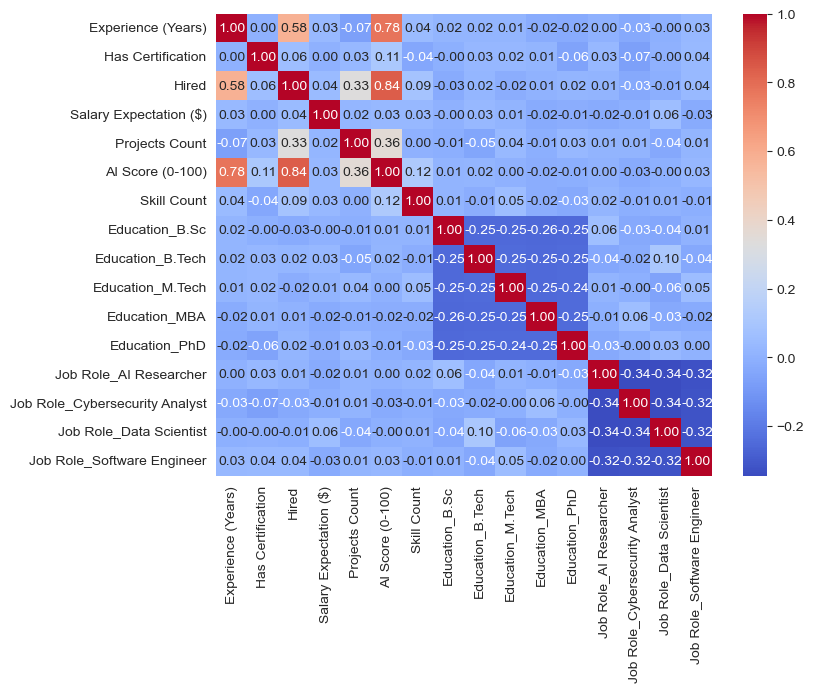

In [50]:
columns_for_heatmap = ['Experience (Years)', 'Has Certification', 'Hired', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)', 'Skill Count', 'Education_B.Sc', 'Education_B.Tech', 'Education_M.Tech', 'Education_MBA', 'Education_PhD', 'Job Role_AI Researcher', 'Job Role_Cybersecurity Analyst', 'Job Role_Data Scientist', 'Job Role_Software Engineer']
heatmap_data = resumes[columns_for_heatmap]
correlation_matrix = heatmap_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()